Import numpy, pandas, matplotlib.pyplot and seaborn library

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read citrus.csv dataset

In [18]:
df=pd.read_csv("citrus.csv")

Show top 3 rows

In [4]:
df.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


Show bottom 3 rows

In [5]:
df.tail(3)

,name,diameter,weight,red,green,blue
9997,grapefruit,15.59,256.50,168,82,20
9998,grapefruit,15.92,260.14,142,72,11
9999,grapefruit,16.45,261.51,152,74,2


Show data info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


Describe data

In [7]:

df.describe()

,diameter,weight,red,green,blue
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.975685,175.050792,153.847800,76.010600,11.363200
std,1.947844,29.212119,10.432954,11.708433,9.061275
min,2.960000,86.760000,115.000000,31.000000,2.000000
25%,8.460000,152.220000,147.000000,68.000000,2.000000
50%,9.980000,174.985000,154.000000,76.000000,10.000000
75%,11.480000,197.722500,161.000000,84.000000,17.000000
max,16.450000,261.510000,192.000000,116.000000,56.000000


Show advance stats using Om_stats library

In [7]:
import Omkar_statistics

Show null values in %

In [8]:
df.isnull().sum()/len(df)*100

name        0.0
diameter    0.0
weight      0.0
red         0.0
green       0.0
blue        0.0
dtype: float64

Show duplicated values

In [9]:
df.duplicated().sum()

np.int64(0)

Convert textual data into numerical form

In [7]:
df=pd.get_dummies(df,dtype=int,drop_first=True)

In [8]:
df

,diameter,weight,red,green,blue,name_orange
0,2.96,86.76,172,85,2,1
1,3.91,88.05,166,78,3,1
2,4.42,95.17,156,81,2,1
3,4.47,95.60,163,81,4,1
4,4.48,95.76,161,72,9,1
...,...,...,...,...,...,...
9995,15.35,253.89,149,77,20,0
9996,15.41,254.67,148,68,7,0
9997,15.59,256.50,168,82,20,0
9998,15.92,260.14,142,72,11,0


<Axes: xlabel='red', ylabel='blue'>

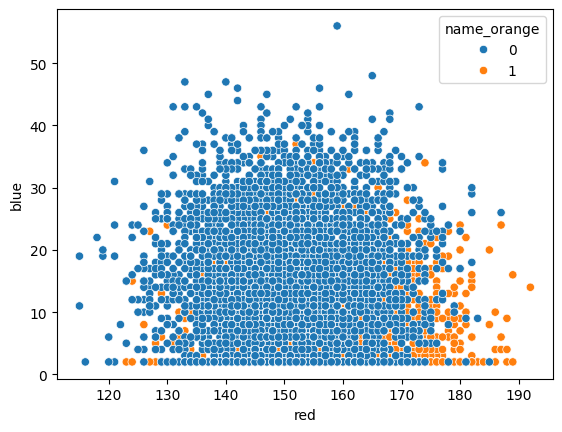

In [12]:
sns.scatterplot(x="red",y="blue",data=df,hue="name_orange")

In [13]:
df

,diameter,weight,red,green,blue,name_orange
0,2.96,86.76,172,85,2,1
1,3.91,88.05,166,78,3,1
2,4.42,95.17,156,81,2,1
3,4.47,95.60,163,81,4,1
4,4.48,95.76,161,72,9,1
...,...,...,...,...,...,...
9995,15.35,253.89,149,77,20,0
9996,15.41,254.67,148,68,7,0
9997,15.59,256.50,168,82,20,0
9998,15.92,260.14,142,72,11,0


In [14]:
for col_name in df.columns:
    print(col_name)
    Omkar_statistics.cal_stats(col_name,df[col_name])
    print('-'*50)

diameter
diameter
Total Sum 99756.85
Total Count 10000
Minimum 2.96
Maximum 16.45
Range 13.49
Average 9.98
Median 9.98
Mode ModeResult(mode=np.float64(8.42), count=np.int64(29))
Q1 8.46
Q3 11.48
IQR 3.0199999999999996
Lower Whisker 3.9300000000000015
Upper Whisker 16.009999999999998
Variance 3.7937155107750002
Standard Deviation 1.9477462644746621
Skewness -0.028313016667624907
Kurtosis -0.6681866401135328
--------------------------------------------------
weight
weight
Total Sum 1750507.92
Total Count 10000
Minimum 86.76
Maximum 261.51
Range 174.75
Average 175.05
Median 174.98
Mode ModeResult(mode=np.float64(138.09), count=np.int64(7))
Q1 152.22
Q3 197.7225
IQR 45.5025
Lower Whisker 83.96625
Upper Whisker 265.97625
Variance 853.262576972736
Standard Deviation 29.210658619290598
Skewness 0.022837268468197128
Kurtosis -0.6978991500614264
--------------------------------------------------
red
red
Total Sum 1538478
Total Count 10000
Minimum 115
Maximum 192
Range 77
Average 153.85
Median 1

Show correlation heatmap

In [15]:
df.drop("diameter",axis=1,inplace=True)

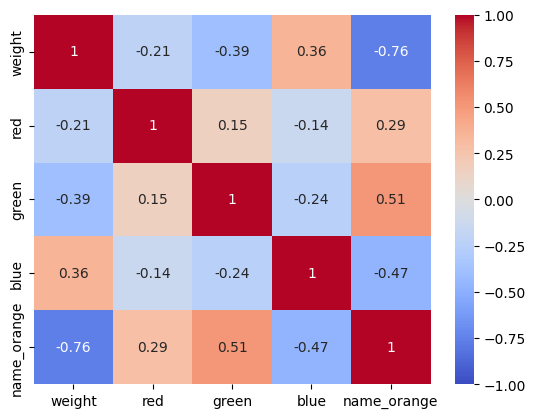

In [16]:
sns.heatmap(df.corr(numeric_only=True),annot=True,vmin=-1, cmap='coolwarm')
plt.show()

Create pairplot with hue as target

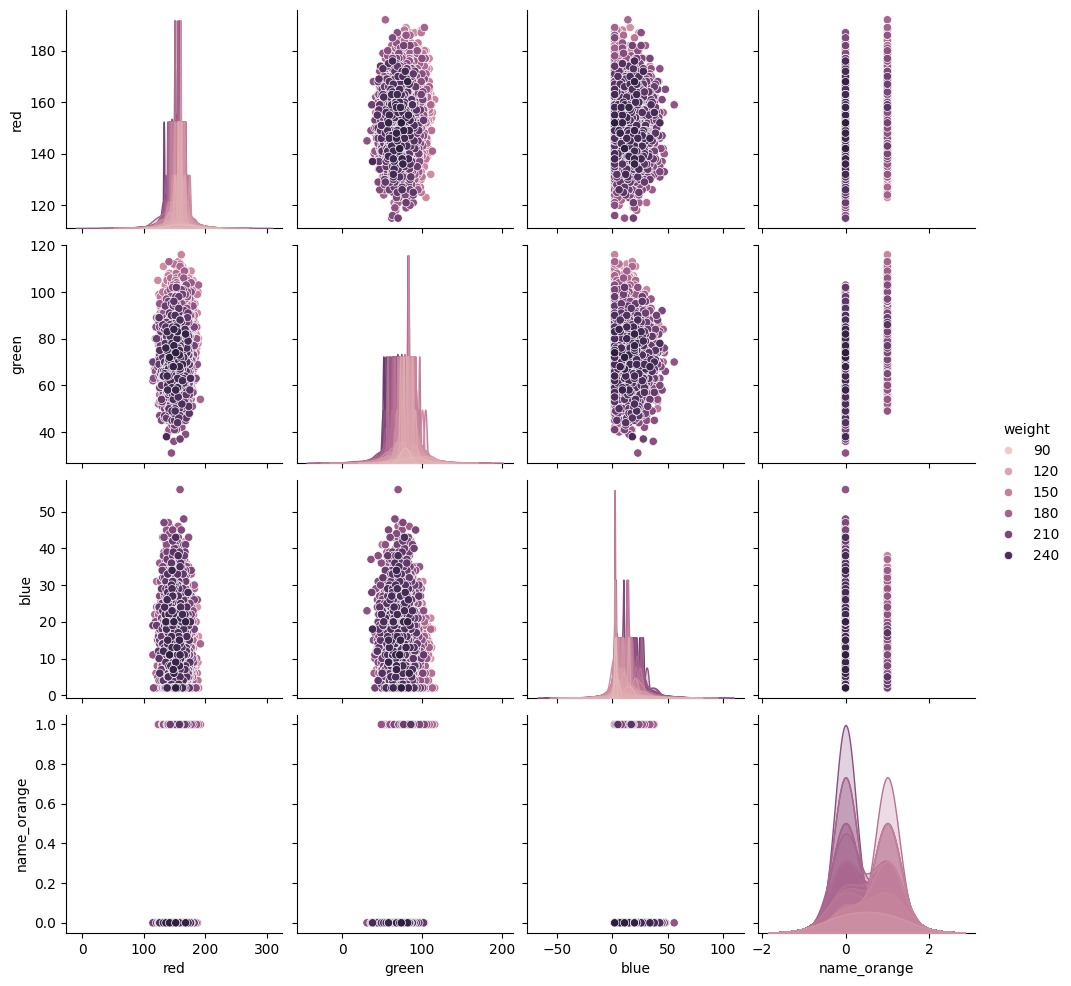

In [17]:
sns.pairplot(data=df,hue='weight')

Create boxplot for each column

weight


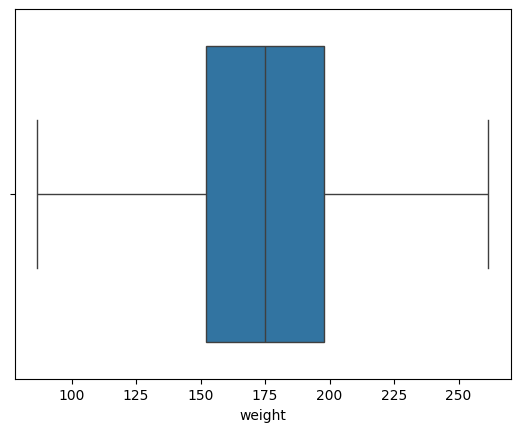

red


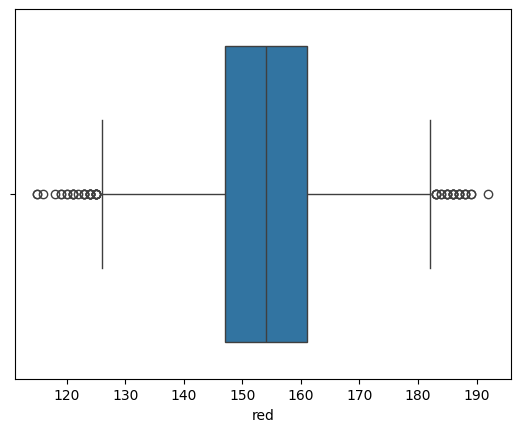

green


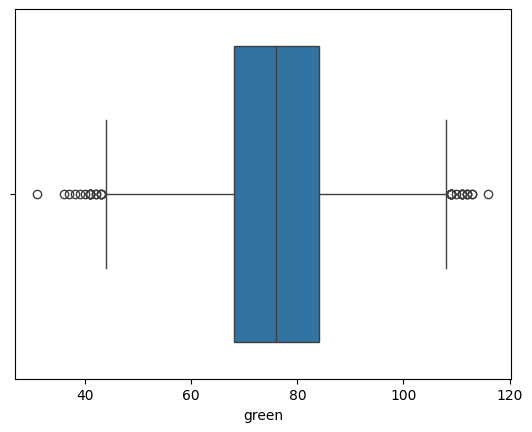

blue


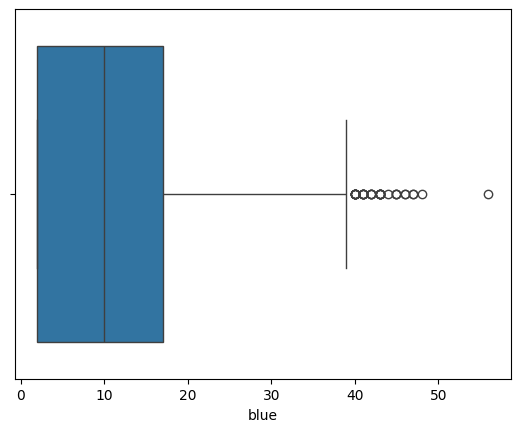

name_orange


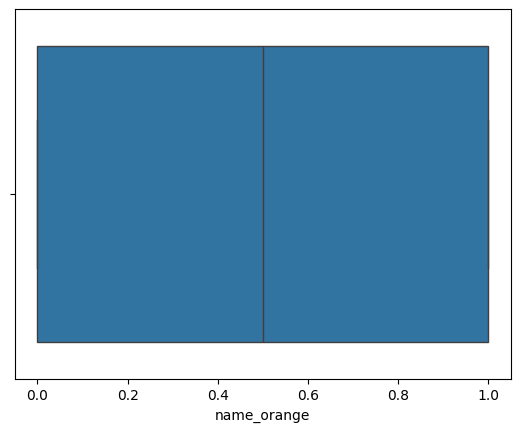

In [18]:
for col_name in df.select_dtypes('number').columns:
    print(col_name)
    sns.boxplot(df,x=col_name)
    plt.show()

Create distribution plot for each column

weight


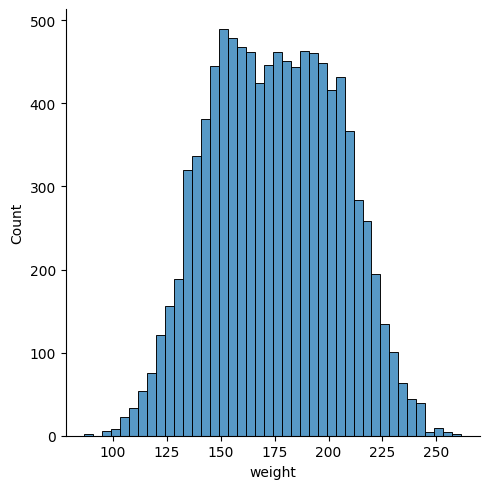

red


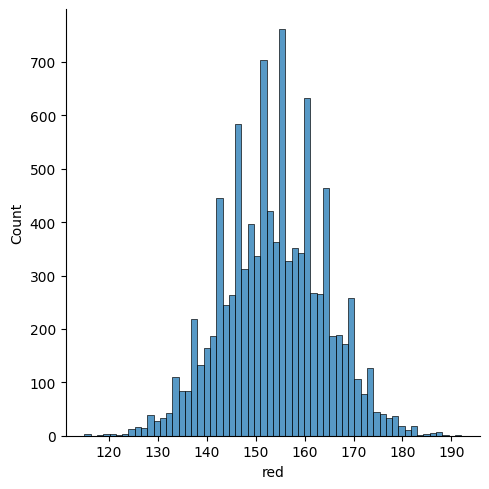

green


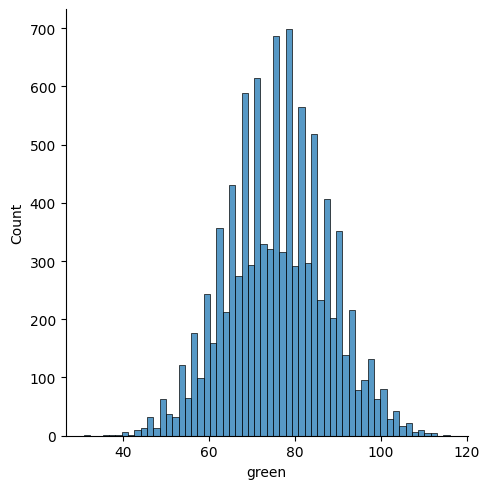

blue


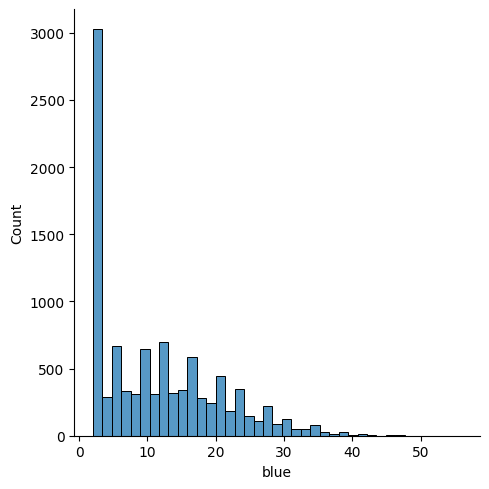

name_orange


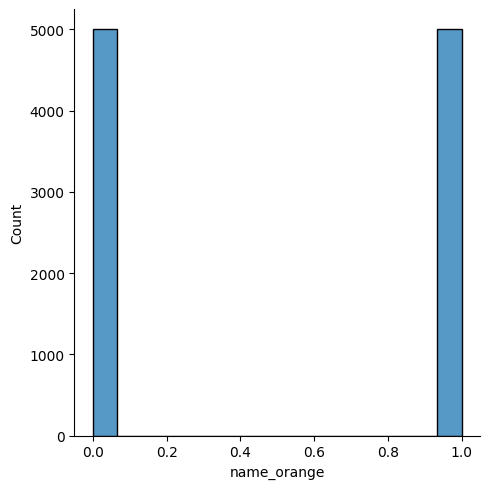

In [19]:
for col_name in df.columns:
    print(col_name)
    sns.displot(df[col_name])
    plt.show()

Define X and y

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
from sklearn.preprocessing import StandardScaler

In [23]:
df['name']=df['name'].map({'orange':1,'grapefruit':0})

In [25]:
X=df.drop('name',axis=1)
y=df['name']

Standard scale your data

In [26]:
# average=0
#std=1
ss=StandardScaler()
X=ss.fit_transform(X)

Do train test split on data with 20% as test size

In [27]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

Perform Logistic Regression on training data and show classification report on testing data

In [28]:

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [29]:
y_pred=lr.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1026
           1       0.94      0.94      0.94       974

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



Use elbow method to choose the best k value for KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
error_li=[]
for k in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    error=1-accuracy_score(y_test,y_pred)
    error_li.append(error)

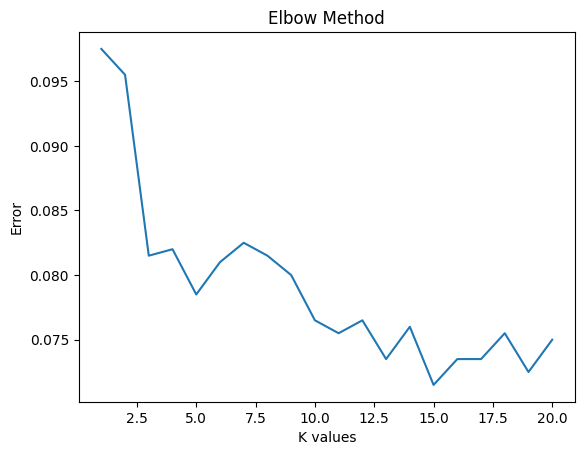

In [31]:
plt.title('Elbow Method')
plt.plot(range(1,21),error_li)
plt.xlabel('K values')
plt.ylabel('Error')
plt.show()

Perform KNN with best k value on training data and show classification report on testing data

In [32]:
knn=KNeighborsClassifier(n_neighbors=7, metric='euclidean')
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1026
           1       0.91      0.92      0.92       974

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



In [33]:
df.iloc[332]

name          1.00
diameter      6.59
weight      124.75
red         162.00
green        96.00
blue          3.00
Name: 332, dtype: float64

In [31]:
weight=float(input("your weight detail :"))
red	=float(input("your red detail :"))
green=float(input("your green detail :"))

blue=float(input("your blue detail :"))

user_input=np.array([weight,red,green,blue]).reshape(1,-1)

your weight detail : 12
your red detail : 23
your green detail : 344
your blue detail : 555


In [32]:
check_df=df.drop('name_orange',axis=1)
check_df=ss.fit_transform(check_df)

In [33]:
final_pred=lr.predict(check_df)

In [71]:
print(classification_report(df['name_orange'],final_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      5000
           1       0.92      0.93      0.93      5000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



array([ 95.86, 142.  , 100.  ,   2.  ,   1.  ])

In [37]:
user_input=X[5].reshape(1,-1)
if lr.predict(user_input)==0:
    print('grapefruit')
else:
    print('orange')

orange


In [20]:
df['predicted'] = lr.predict(X)


In [39]:
df.iloc[-1]

name          0.00
diameter     16.45
weight      261.51
red         152.00
green        74.00
blue          2.00
Name: 9999, dtype: float64

In [40]:
diameter=float(input("your diameter detail :"))
weight=float(input("your weight detail :"))
red	=float(input("your red detail :"))
green=float(input("your green detail :"))

blue=float(input("your blue detail :"))

user_input=np.array([diameter,weight,red,green,blue]).reshape(1,-1)
if lr.predict(user_input)==0:
    print('grapefruit')
else:
    print('orange')

your diameter detail : 16.45
your weight detail : 261.51
your red detail : 152
your green detail : 74
your blue detail : 2


orange


In [47]:
lr.predict(X[-1].reshape(1,-1))

array([0])

In [48]:
X[-1]

array([ 3.32400329,  2.95985137, -0.17712073, -0.17173097, -1.03337209])